# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
# from scipy.stats import linregress

# Import API key
from api_keys_Booth import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities_booth.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities[0:5]

['hilo', 'nikolskoye', 'grand river south east', 'kapaa', 'nizhneyansk']

In [15]:
 # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=281be2486253ccff94ff872de6846da7&units=metric&q='

In [20]:
# set up lists to hold reponse info
lats = []
longs = []
temps = []
winds = []
pressures = []
humiditys = []
countries = []
dates = []

# Loop through the list of cities and perform a request for data on each
for city in cities[0:50]:
    response = requests.get(query_url + city)
    
    if response.status_code == 200:    
        data = response.json()
        
        try:
            # extract all data points before appending (don't append twice)
            lat = data['coord']['lat']
            lng = data['coord']['lon']
            temp = data['main']['temp']
            pressure = data['main']['pressure']
            humid = data['main']['humidity']
            wind = data['wind']['speed']
            country = data["sys"]["country"]
            date = data["dt"]
            
            # append to lists
            lats.append(lat)
            longs.append(lng)
            temps.append(temp)
            pressures.append(pressure)
            humiditys.append(humid)
            winds.append(wind)
            countries.append(country)
            dates.append(date)
            
        except: # we failed to extract all data points
            lats.append(np.nan)
            longs.append(np.nan)
            temps.append(np.nan)
            winds.append(np.nan)
            pressures.append(np.nan)
            humiditys.append(np.nan)
            countries.append("")
            dates.append(np.nan)
    else:
        lats.append(np.nan)
        longs.append(np.nan)
        temps.append(np.nan)
        winds.append(np.nan)
        pressures.append(np.nan)
        humiditys.append(np.nan)
        countries.append("")
        dates.append(np.nan)
    
    # avoid rate limits
    print(city)
    time.sleep(1)

hilo
nikolskoye
grand river south east
kapaa
nizhneyansk
dikson
karaul
yulara
itaituba
zhelyabovka
hohhot
qaanaaq
leningradskiy
vaini
mataura
cabedelo
gat
mayahi
ikalamavony
chuy
arcachon
faanui
arraial do cabo
busselton
bluff
cape town
san rafael
letnyaya stavka
tuktoyaktuk
anadyr
iqaluit
bredasdorp
half moon bay
hopkinsville
vila velha
souillac
kongoussi
fukue
karla
ushuaia
rikitea
zelenoborskiy
georgetown
yellowknife
fereydun kenar
atuona
chegdomyn
shenjiamen
kodiak
barrow


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
weather_data = pd.DataFrame()

weather_data["City"] = cities[0:50]
weather_data["Country"] = countries
weather_data["Latitude"] = lats
weather_data["Longitude"] = longs
weather_data["Temp"] = temps
weather_data["Wind"] = winds
weather_data["Pressure"] = pressures
weather_data["Humidity"] = humiditys
weather_data["Date"] = dates

weather_data

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,hilo,US,19.7297,-155.0900,24.26,0.00,1018.0,87.0,1.627514e+09
1,nikolskoye,RU,59.7035,30.7861,18.06,1.92,1005.0,97.0,1.627514e+09
2,grand river south east,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kapaa,US,22.0752,-159.3190,27.81,1.79,1019.0,72.0,1.627515e+09
4,nizhneyansk,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,dikson,RU,73.5069,80.5464,3.44,5.23,1009.0,95.0,1.627515e+09
6,karaul,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,yulara,AU,-25.2406,130.9889,11.91,1.03,1016.0,62.0,1.627515e+09
8,itaituba,BR,-4.2761,-55.9836,27.67,0.10,1010.0,40.0,1.627515e+09
9,zhelyabovka,UA,45.3988,34.7578,21.95,3.41,1016.0,66.0,1.627515e+09


In [27]:
weather_data.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
mask = weather_data.Humidity > 100
weather_data.loc[mask]

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

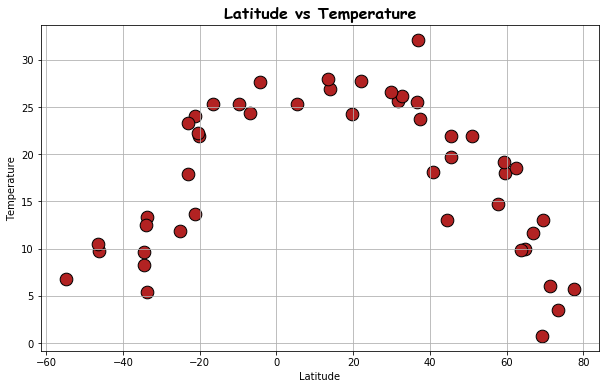

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Temp, color="firebrick", edgecolor="black", s=160)
plt.title("Latitude vs Temperature", fontweight="bold", fontsize=16, fontname="Comic Sans MS")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

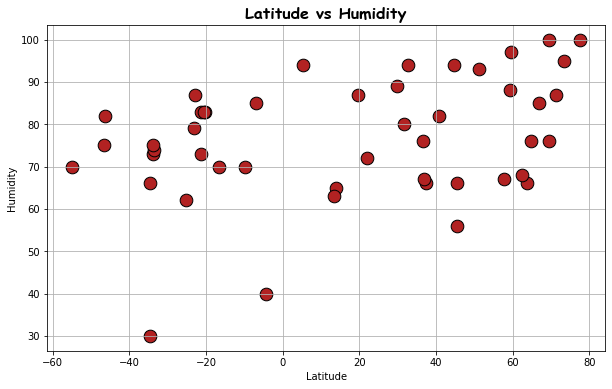

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(weather_data.Latitude, weather_data.Humidity, color="firebrick", edgecolor="black", s=160)
plt.title("Latitude vs Humidity", fontweight="bold", fontsize=16, fontname="Comic Sans MS")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

In [43]:
df_north = weather_data.loc[weather_data.Latitude >= 0].reset_index(drop=True)
df_south = weather_data.loc[weather_data.Latitude < 0].reset_index(drop=True)

df_north.head()

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,hilo,US,19.7297,-155.0900,24.26,0.00,1018.0,87.0,1.627514e+09
1,nikolskoye,RU,59.7035,30.7861,18.06,1.92,1005.0,97.0,1.627514e+09
2,kapaa,US,22.0752,-159.3190,27.81,1.79,1019.0,72.0,1.627515e+09
3,dikson,RU,73.5069,80.5464,3.44,5.23,1009.0,95.0,1.627515e+09
4,zhelyabovka,UA,45.3988,34.7578,21.95,3.41,1016.0,66.0,1.627515e+09


In [44]:
df_south.head()

,City,Country,Latitude,Longitude,Temp,Wind,Pressure,Humidity,Date
0,yulara,AU,-25.2406,130.9889,11.91,1.03,1016.0,62.0,1.627515e+09
1,itaituba,BR,-4.2761,-55.9836,27.67,0.10,1010.0,40.0,1.627515e+09
2,vaini,TO,-21.2000,-175.2000,24.09,4.12,1020.0,83.0,1.627514e+09
3,mataura,NZ,-46.1927,168.8643,9.71,1.88,1011.0,82.0,1.627514e+09
4,cabedelo,BR,-6.9811,-34.8339,24.37,5.42,1015.0,85.0,1.627515e+09


In [45]:
df_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       28 non-null     object 
 1   Country    28 non-null     object 
 2   Latitude   28 non-null     float64
 3   Longitude  28 non-null     float64
 4   Temp       28 non-null     float64
 5   Wind       28 non-null     float64
 6   Pressure   28 non-null     float64
 7   Humidity   28 non-null     float64
 8   Date       28 non-null     float64
dtypes: float64(7), object(2)
memory usage: 2.1+ KB


In [46]:
df_south.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City       19 non-null     object 
 1   Country    19 non-null     object 
 2   Latitude   19 non-null     float64
 3   Longitude  19 non-null     float64
 4   Temp       19 non-null     float64
 5   Wind       19 non-null     float64
 6   Pressure   19 non-null     float64
 7   Humidity   19 non-null     float64
 8   Date       19 non-null     float64
dtypes: float64(7), object(2)
memory usage: 1.5+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression